In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

#Catch the string, convert the levels, then count the levels with server errors
df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]

print(df.shape[0])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1209123


175045
63957


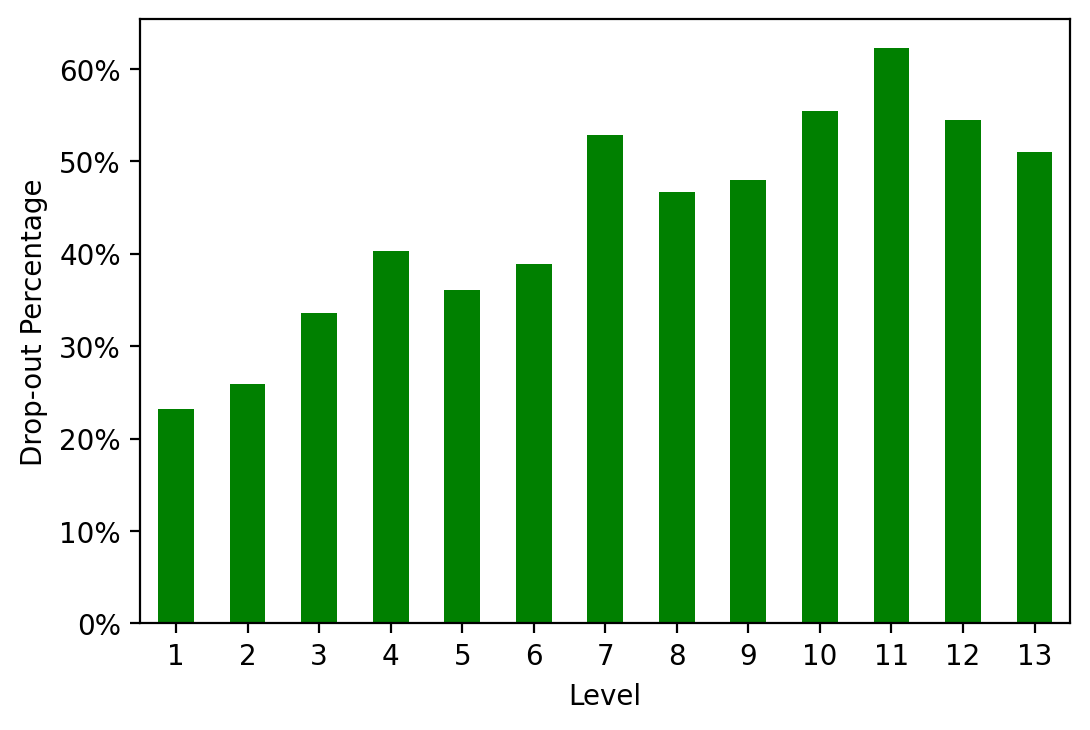

In [6]:
import matplotlib.ticker as mtick

df = df.sort_values(by=['session', 'level', 'date'], ascending=[True, True, True])
df = df.drop_duplicates(subset = ["code"], keep="first")

print(df.groupby(['session', 'level']).ngroups)
df = df.groupby(['session', 'level']).tail(1) #Keep for each session only the last value in the level

drop_out_df = df[['level', 'server_error']] #Make a quite smaller dataframe, only with relevant stuff
y = []

print(df[df['server_error'] != '-'].shape[0])

for level in range(1, 14):
    temp = drop_out_df.loc[drop_out_df['level'] == level]
    y.append(temp[temp['server_error'] != '-'].shape[0] / temp.shape[0] * 100)

grouped = drop_out_df.groupby('level').size()
grouped = grouped.to_frame().reset_index()
grouped['drop_out'] = y

grouped = grouped[['level', 'drop_out']].copy()
grouped['level'] = grouped['level'].astype(int)
grouped = grouped.set_index('level')

plot = grouped.plot(rot=0, color='green', kind='bar', legend=False)
plot.set(xlabel='Level', ylabel='Drop-out Percentage')
plot.yaxis.set_major_formatter(mtick.PercentFormatter())